## prob  1

Task 1 : https://www.kaggle.com/code/harshdugar/notebook12d62d85bb
Task 2 : https://www.kaggle.com/code/harshdugar/notebook693a161bff

## Prob 2

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score as acc
%matplotlib inline
 

In [2]:
tr_data = pd.read_csv('train.csv',header=None)
ts_data = pd.read_csv('test.csv',header=None)
# type(tr_data)
print(tr_data.columns)
Y_train=tr_data[16]
col=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
X_train=tr_data[col]
tr_data.head()
# X_train.head()

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


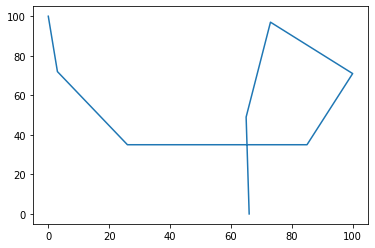

In [3]:
tr=np.array(tr_data)
ts=np.array(ts_data)
def draw(arr):
    digit_x=np.array([arr[i] for i in range(0,16,2)])
    digit_y=np.array([arr[i] for i in range(1,16,2)]) 
    plt.plot(digit_x,digit_y)
    plt.show()
    
draw1= tr_data.loc[6]
draw(draw1)

 

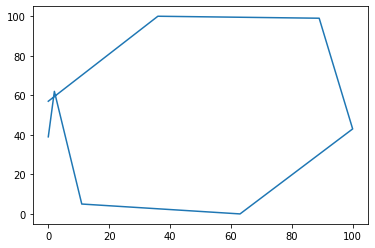

In [4]:
draw2=tr_data.loc[7]
draw(draw2)

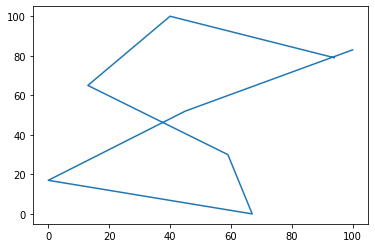

In [5]:
draw3=tr_data.loc[68]
draw(draw3)

In [6]:
model=lr().fit(X_train,Y_train)
Y_test=ts_data[16]
col=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
X_test=ts_data[col]

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
print(model.score(X_train,Y_train))


0.9583666933546837


In [8]:
model.score(X_test,Y_test)


0.9048027444253859

In [9]:
acc(Y_test,model.predict(X_test))

    

0.9048027444253859

Task 3

In [10]:
import scipy.stats
class KNN:
    def __init__(self, k):
         self.k=k
        
    def load(self, dataset):
         [self.X,self.y]=dataset
        
    def distance(self, p1, p2):
         return (p1-p2)**2
    
    def score(self,X_test,y_test):
        return acc(y_test,self.predict(X_test))

    def predict(self, test):
        y_pred=[]
        for test_point in test.to_numpy():
                distances = np.linalg.norm(self.X - test_point, axis=1)
                nearest_neighbors_id = distances.argsort()[:self.k]
                nearest_neighbors_y=self.y[nearest_neighbors_id]
                y_pred.append(scipy.stats.mode(nearest_neighbors_y).mode[0])
        return y_pred

In [11]:
model=KNN(1)
model.load([X_train, Y_train])
model.score(X_test,Y_test)

0.9774156660949114

In [ ]:
train=[]
test=[]
for i in range(1,10):
    model=KNN(i)
    model.load([X_train, Y_train])
    train.append(model.score(X_train,Y_train))
    
    test.append(model.score(X_test,Y_test))
plt.plot(train)
plt.plot(test)

## To decide the hyperparameters using the test accuracy is not the best way. Why?

As if we do that we are trying to fit our model to better suit the test data and we may lose the actual treand and hence not perform well on new data.